# Predicting Credit Card Fraud

The dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud. The goal here is to accurately predict whether a transaction is fraudulent or not.



In [2]:
# importing the libraries needed

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

data = pd.read_csv('credit_card_fraud.csv') 

In [3]:
# having an overview of the data set

data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [4]:
data.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0
339606,2020-12-31 23:59:24,Breitenberg LLC,travel,7.99,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0


### Having an overview of the data type and setting the columns to their respective data-type

In [5]:
data.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## setting the columns to their respective correct data-type

In [6]:
# setting the columns to their respective right data-type

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time']).dt.date
data['category'] = data['category'].astype('category')
data['dob'] = pd.to_datetime(data['dob']).dt.date
data['is_fraud'] = data['is_fraud'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['job'] = data['job'].astype('category')

## Checking for missing values

In [7]:
data.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

The result shows that there is no missing values.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   trans_date_trans_time  339607 non-null  object  
 1   merchant               339607 non-null  object  
 2   category               339607 non-null  category
 3   amt                    339607 non-null  float64 
 4   city                   339607 non-null  category
 5   state                  339607 non-null  category
 6   lat                    339607 non-null  float64 
 7   long                   339607 non-null  float64 
 8   city_pop               339607 non-null  int64   
 9   job                    339607 non-null  category
 10  dob                    339607 non-null  object  
 11  trans_num              339607 non-null  object  
 12  merch_lat              339607 non-null  float64 
 13  merch_long             339607 non-null  float64 
 14  is_fraud            

a. The dataset contains 339607 records and 15 fields. \
b. There is no missing data in the fields


## Relationship Analysis

#### The correlation matrix

In [9]:
correlation = data.corr()

correlation

,amt,lat,long,city_pop,merch_lat,merch_long
amt,1.000000,0.002817,-0.007017,0.006050,0.002957,-0.006891
lat,0.002817,1.000000,-0.151364,-0.236336,0.993646,-0.151267
long,-0.007017,-0.151364,1.000000,-0.066080,-0.150385,0.998960
city_pop,0.006050,-0.236336,-0.066080,1.000000,-0.235019,-0.066052
merch_lat,0.002957,0.993646,-0.150385,-0.235019,1.000000,-0.150278
merch_long,-0.006891,-0.151267,0.998960,-0.066052,-0.150278,1.000000


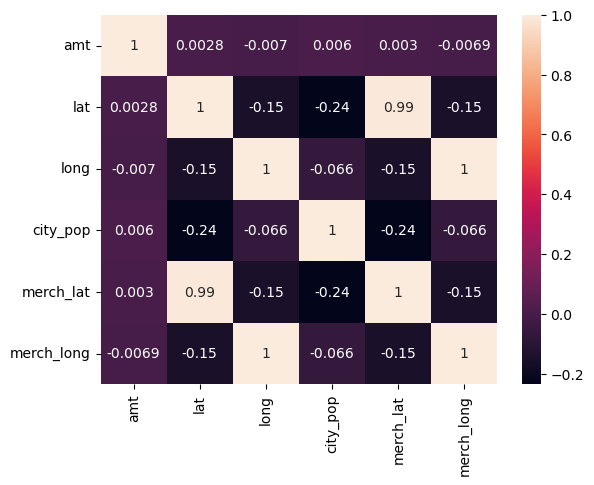

In [10]:
sns.heatmap(correlation, annot= True)
plt.show()

Here, we can tell from the correlation matrix that, there is a high positive correlation between longitude location of purchase and longitude of merchant with r = 0.9989; and latitude location of merchant with the latitude location of purchase with r=0.99.

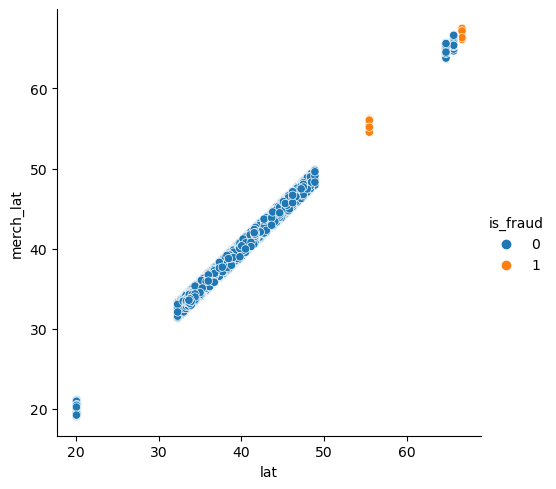

In [11]:
sns.relplot(data= data, x= 'lat', y= 'merch_lat', hue= 'is_fraud')

plt.show()

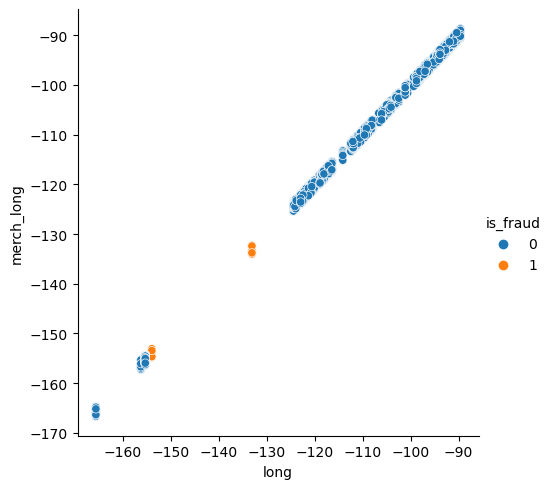

In [12]:
sns.relplot(data= data, x= 'long', y= 'merch_long', hue= 'is_fraud')

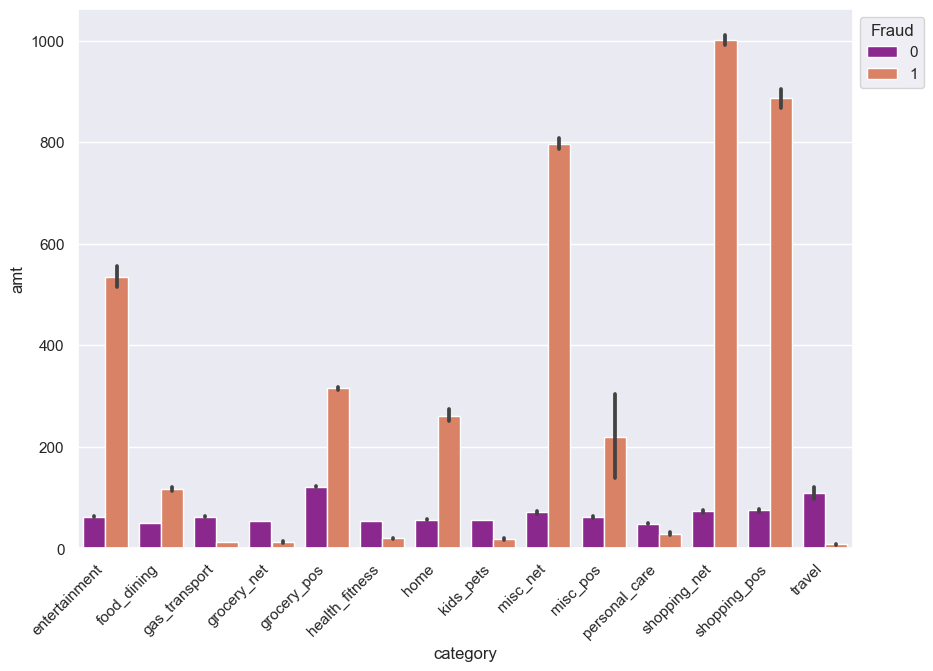

In [13]:
# Setting the plot size (width, height) in inches
sns.set(rc= {'figure.figsize' : (10, 7)})

sns.barplot(data= data, x= 'category', y= 'amt', hue= 'is_fraud', palette = 'plasma' )
plt.xticks(rotation = 45, ha = 'right')

# moving the legend outside the chart
plt.legend(loc= 'upper left', bbox_to_anchor= (1,1), title= 'Fraud')
plt.show()

From the barchart above, considering the categories and amount of transactions, we can see that fraudulent transactions occur more in shopping net, shopping pos, misc net, and entertainment. Hence, we can say that shopping net and shopping pos can be more instances of fraud.

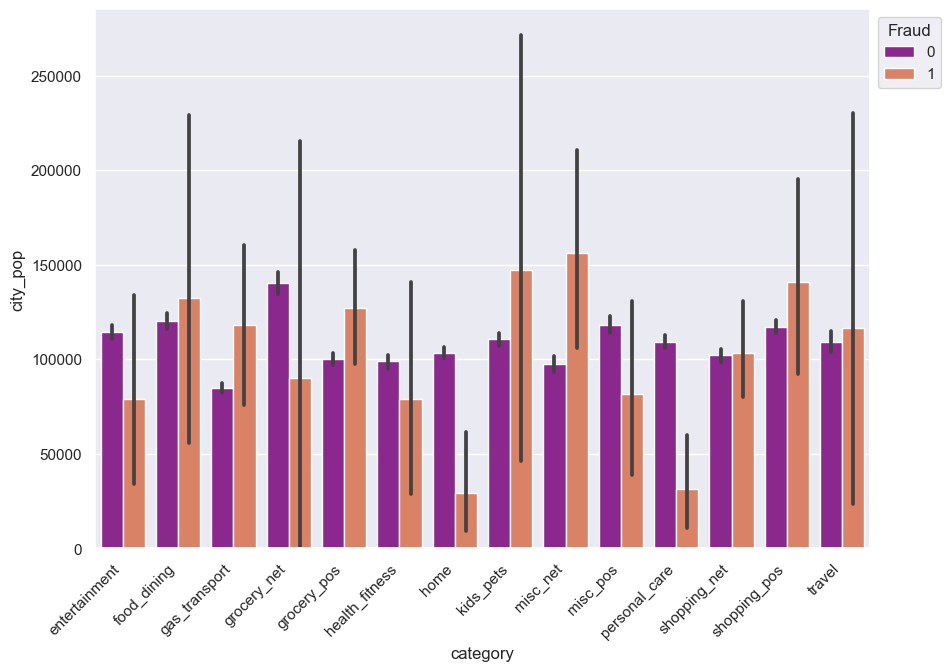

In [14]:
# Setting the plot size (width, height) in inches
sns.set(rc= {'figure.figsize' : (10, 7)})

sns.barplot(data= data, x= 'category', y= 'city_pop', hue= 'is_fraud', palette = 'plasma')
plt.xticks(rotation = 45, ha = 'right')

# moving the legend outside the chart
plt.legend(loc= 'upper left', bbox_to_anchor= (1,1), title= 'Fraud')
plt.show()

In [15]:
#import folium

In [16]:
#folium.Map(location= [34.052235, -118.243683])

In [17]:
#m = folium.Map()

#m.save('footprint.html')

In [18]:
group_data = data.groupby(by = ['is_fraud'])

In [19]:
group_data.sum()

,amt,lat,long,city_pop,merch_lat,merch_long
is_fraud,,,,,,
0,23045584.75,1.341691e+07,-3.736969e+07,36178054094,1.341691e+07,-3.736959e+07
1,923192.65,7.193415e+04,-1.985246e+05,207733821,7.189288e+04,-1.985428e+05


In [20]:
proportion_pop_defrauded = 207733821/(data['city_pop'].sum())

proportion_pop_defrauded

0.00570920221613126

In [21]:
proportion_pop_not_defrauded = 36178054094/(data['city_pop'].sum())

proportion_pop_not_defrauded

0.9942907977838688

from the analysis performed, the proportion of the population that was defrauded is given by proportion_pop_defrauded above, which is about 0.01% of the population. \
the proportion of the population that was not defrauded is given by proportion_pop_not_defrauded above, which is about 99.4% of the population. 

### Machine learning 
#### Creating a KMeans classification model

In [22]:
sample = data['is_fraud']

samples = np.array(sample)

samples = samples.reshape(-1, 1)

In [23]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2)

model.fit(samples)

c:\Users\Martosoft\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [24]:
labels = model.predict(samples)
print(labels)

print(model.inertia_)

[0 0 0 ... 0 0 0]
2.5603066534730745e-23


#### Using the model to predict new sampled data

In [25]:
new_samples = [1.2,0.6,1,0.2,1,0,-2,0.5,0.7]
new_samples = np.array(new_samples)
new_samples = new_samples.reshape(-1, 1)

print(new_samples)

[[ 1.2]
 [ 0.6]
 [ 1. ]
 [ 0.2]
 [ 1. ]
 [ 0. ]
 [-2. ]
 [ 0.5]
 [ 0.7]]


In [26]:
new_labels = model.predict(new_samples)
print(new_labels)

[1 1 1 0 1 0 0 0 1]
